In [2]:
import numpy as np
from sklearn import linear_model
import pandas as pd
import random

In [5]:
from __future__ import print_function

import os
import subprocess
from time import time
from operator import itemgetter
from scipy.stats import randint

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('D:/Courses/DSGA1003/project/NoDropping_authorcounts.csv')

In [3]:
df = df.drop(['_id','abstract', 'byline', 'document_type', 'headline', 'keywords',
                      'lead_paragraph', 'multimedia', 'news_desk', 'print_page', 'pub_date',
                      'section_name', 'slideshow_credits', 'snippet', 'source',
                      'type_of_material', 'web_url','abstract_list', 'nonstop_abstract_list','snippet_list', 
                      'nonstop_snippet_list','author', 'day','author_count'],1)

In [5]:
df['auth_c'].fillna(0,inplace = True)

In [6]:
df['comments_class'] = 0
A = []
for i in range(len(df)):
    if df['comments_count'][i] == 0:
        a = 0
    #elif df['comments_count'][i] in range(1,8):
        #a = 2
    elif df['comments_count'][i] in range(1,43):
        a = 1
    #elif df['comments_count'][i] in range(43,164):
        #a = 4
    elif df['comments_count'][i] > 42:
        a = 2
    A.append(a)

In [7]:
df['comments_class'] = A

In [8]:
df.to_csv('D:/Courses/DSGA1003/project/three_class_author_counts.csv',index = False, encoding = 'utf-8')

In [9]:
df = pd.read_csv('D:/Courses/DSGA1003/project/three_class_author_counts.csv')

In [10]:
df['comments_class'].value_counts()

0    42787
1     8206
2     8198
Name: comments_class, dtype: int64

In [313]:
df.shape

(59191, 79)

In [11]:
length = len(df)
rand = list(range(length))
split1 = int(length*0.6)
split2 = int(length*0.8)
np.random.shuffle(rand)
train_index = rand[:split1]
valid_index = rand[split1:split2]
test_index = rand[split2:]
train_df = df.iloc[train_index,:]
valid_df = df.iloc[valid_index,:]
test_df = df.iloc[test_index,:]
label = ['comments_class','comments_count']
feature = ['word_count', 'abstract_polarity', 'snippet_polarity',
           'abstract_subjectivity', 'snippet_subjectivity', 'number_of_pictures',
           'abstract_word_cnt', 'snippet_word_cnt', 'headline_word_cnt',
           'abstract_nonstopword_cnt', 'snippet_nonstopword_cnt',
           'abstract_unique_nonstopword_cnt', 'snippet_unique_nonstopword_cnt',
           'ave_pos_polarity', 'max_pos_polarity', 'min_pos_polarity',
           'ave_neg_polarity', 'max_neg_polarity', 'min_neg_polarity',
           'count_pos_word', 'count_neg_word', 'rate_pos_abs', 'rate_neg_abs',
           'rate_pos_lead', 'rate_neg_lead', 'rate_pos_head', 'rate_neg_head',
           'section_name_Arts', 'section_name_Automobiles', 'section_name_Blogs',
           'section_name_Books', 'section_name_Business Day',
           'section_name_Crosswords & Games', 'section_name_Crosswords/Games',
           'section_name_Education', 'section_name_Fashion & Style',
           'section_name_Food', 'section_name_Giving', 'section_name_Health',
           'section_name_Home & Garden', 'section_name_Job Market',
           'section_name_Magazine', 'section_name_Movies',
           'section_name_Multimedia', 'section_name_Multimedia/Photos',
           'section_name_N.Y. / Region', 'section_name_Obituaries',
           'section_name_Open', 'section_name_Opinion',
           'section_name_Public Editor', 'section_name_Real Estate',
           'section_name_Science', 'section_name_Sports', 'section_name_Style',
           'section_name_Sunday Review', 'section_name_T Magazine',
           'section_name_Technology', 'section_name_The Upshot',
            'section_name_Theater', 'section_name_Times Topics',
           'section_name_Travel', 'section_name_U.S.', 'section_name_Universal',
           'section_name_World', 'section_name_Your Money', 'section_name_false',
           'section_name_nan', 'Friday', 'Monday', 'Saturday', 'Sunday',
           'Thursday', 'Tuesday', 'Wednesday', 'article', 'blogpost',
           'comments_count']
x_train = train_df.drop(label,1)
y_train = train_df.drop(feature,1)
x_valid = valid_df.drop(label,1)
y_valid = valid_df.drop(feature,1)
x_test = test_df.drop(label,1)
y_test = test_df.drop(feature,1)
x_train.to_csv('D:/Courses/DSGA1003/project/x_train.csv',index = False, encoding = 'utf-8')
y_train.to_csv('D:/Courses/DSGA1003/project/y_train.csv',index = False, encoding = 'utf-8')
x_test.to_csv('D:/Courses/DSGA1003/project/x_test.csv',index = False, encoding = 'utf-8')
y_test.to_csv('D:/Courses/DSGA1003/project/y_test.csv',index = False, encoding = 'utf-8')
x_valid.to_csv('D:/Courses/DSGA1003/project/x_valid.csv',index = False, encoding = 'utf-8')
y_valid.to_csv('D:/Courses/DSGA1003/project/y_valid.csv',index = False, encoding = 'utf-8')

## Load Data


In [5]:
x_train = pd.read_csv('D:/Courses/DSGA1003/project/x_train.csv')
y_train = pd.read_csv('D:/Courses/DSGA1003/project/y_train.csv')
x_test = pd.read_csv('D:/Courses/DSGA1003/project/x_test.csv')
y_test = pd.read_csv('D:/Courses/DSGA1003/project/y_test.csv')
x_valid = pd.read_csv('D:/Courses/DSGA1003/project/x_valid.csv')
y_valid = pd.read_csv('D:/Courses/DSGA1003/project/y_valid.csv')

In [6]:
y_train = y_train['comments_class']
y_test = y_test['comments_class']
y_valid = y_valid['comments_class']

In [7]:
x_train.columns

Index(['word_count', 'abstract_polarity', 'snippet_polarity',
       'abstract_subjectivity', 'snippet_subjectivity', 'number_of_pictures',
       'abstract_word_cnt', 'snippet_word_cnt', 'headline_word_cnt',
       'abstract_nonstopword_cnt', 'snippet_nonstopword_cnt',
       'abstract_unique_nonstopword_cnt', 'snippet_unique_nonstopword_cnt',
       'ave_pos_polarity', 'max_pos_polarity', 'min_pos_polarity',
       'ave_neg_polarity', 'max_neg_polarity', 'min_neg_polarity',
       'count_pos_word', 'count_neg_word', 'rate_pos_abs', 'rate_neg_abs',
       'rate_pos_lead', 'rate_neg_lead', 'rate_pos_head', 'rate_neg_head',
       'section_name_Arts', 'section_name_Automobiles', 'section_name_Blogs',
       'section_name_Books', 'section_name_Business Day',
       'section_name_Crosswords & Games', 'section_name_Crosswords/Games',
       'section_name_Education', 'section_name_Fashion & Style',
       'section_name_Food', 'section_name_Giving', 'section_name_Health',
       'section_nam

## Functions

In [8]:
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters

In [9]:
def run_gridsearch(X, y, clf, param_grid, score_func, cv=5):
    """Run a grid search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_grid -- [dict] parameter settings to test
    cv -- fold of cross-validation, default 5

    Returns
    -------
    top_params -- [dict] from report()
    """
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               scoring = score_func,
                               cv=cv,
                               n_jobs = 4)
    start = time()
    grid_search.fit(X, y)

    print(("\nGridSearchCV took {:.2f} "
           "seconds for {:d} candidate "
           "parameter settings.").format(time() - start,
                len(grid_search.grid_scores_)))

    top_params = report(grid_search.grid_scores_, 3)
    return  top_params

In [10]:
y_test.value_counts()

0    8645
1    1611
2    1583
Name: comments_class, dtype: int64

In [11]:
y_test.shape

(11839,)

## Baseline

In [12]:
y_base = np.repeat(0,11839)

In [13]:
print('F1 scores:')
#predict = rf1.predict(x_valid)
print('Weighted:', f1_score(y_test, y_base, average='macro'))
print('Class 0:',f1_score(y_test == 0, y_base == 0))
print('Class 1:',f1_score(y_test == 1, y_base == 1))
print('Class 2:',f1_score(y_test == 2, y_base == 2))

F1 scores:
Weighted: 0.28135780772
Class 0: 0.84407342316
Class 1: 0.0
Class 2: 0.0


C:\Users\sj238\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sj238\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
eval_matrix = np.array([[3,1,0],[1,4,1],[0,1,5]])
eval_matrix

array([[3, 1, 0],
       [1, 4, 1],
       [0, 1, 5]])

In [15]:
opt_gain = 1583*eval_matrix[2,2]+8645*eval_matrix[0,0]+1611*eval_matrix[1,1]
opt_gain

40294

In [16]:
'''
always predict class 0
'''
base0_gain = 1583*eval_matrix[2,0]+8645*eval_matrix[0,0]+1611*eval_matrix[1,0]
base0_gain

27546

In [17]:
'''
always predict class 1
'''
base0_gain = 1583*eval_matrix[2,1]+8645*eval_matrix[0,1]+1611*eval_matrix[1,1]
base0_gain

16672

In [18]:
'''
always predict class 2
'''
base2_gain = 1583*eval_matrix[2,2]+8645*eval_matrix[0,2]+1611*eval_matrix[1,2]
base2_gain

9526

In [19]:
def get_gain(eval_mat,pred_matrix):
    gain_matrix = np.array([[pred_matrix[0,0]*eval_matrix[0,0],pred_matrix[0,1]*eval_matrix[0,1],pred_matrix[0,2]*eval_matrix[0,2]],
                       [pred_matrix[1,0]*eval_matrix[1,0],pred_matrix[1,1]*eval_matrix[1,1],pred_matrix[1,2]*eval_matrix[1,2]],
                       [pred_matrix[2,0]*eval_matrix[2,0],pred_matrix[2,1]*eval_matrix[2,1],pred_matrix[2,2]*eval_matrix[2,2]]])
    return np.sum(gain_matrix)

## Optimal Random Forest

In [107]:
rf1 = RandomForestClassifier(n_jobs = 2,class_weight={0:0.24, 1:1.23, 2:1.53},n_estimators = 200, max_depth = None, 
                             max_features = 'sqrt', max_leaf_nodes = None, min_samples_leaf = 10, min_samples_split = 10)
rf1.fit(x_train, y_train)
f1_score(y_train, rf1.predict(x_train), average='macro')

0.78306017577310982

In [108]:
rf1.fit(x_train, y_train)
f1_score(y_valid, rf1.predict(x_valid), average='macro')

0.69638373235453177

In [113]:
from sklearn.metrics import f1_score
print('F1 scores:')
predict1 = rf1.predict(x_valid)
print('Weighted:', f1_score(y_valid, predict1, average='macro'))
print('Class 0:',f1_score(y_valid == 0, predict1 == 0))
print('Class 1:',f1_score(y_valid == 1, predict1 == 1))
print('Class 2:',f1_score(y_valid == 2, predict1 == 2))

F1 scores:
Weighted: 0.696383732355
Class 0: 0.872607506836
Class 1: 0.622710622711
Class 2: 0.593833067517


In [114]:
confusion_matrix(y_valid, rf1.predict(x_valid))

array([[7021,  753,  766],
       [ 229, 1190,  210],
       [ 302,  250, 1117]])

In [124]:
predict1 == 0

array([ True,  True,  True, ...,  True,  True, False], dtype=bool)

In [120]:
np.bincount(predict1)

array([7552, 2193, 2093], dtype=int64)

In [112]:
get_gain(eval_matrix,confusion_matrix(y_valid, rf1.predict(x_valid)))

25829

In [20]:
'''Best One'''

rf2 = RandomForestClassifier(n_jobs = 2,class_weight={0:0.24, 1:1.23, 2:1.53},n_estimators = 50, max_depth = None, 
                             max_features = 'sqrt', max_leaf_nodes = None, min_samples_leaf = 2, min_samples_split = 10)
rf2.fit(x_train, y_train)
f1_score(y_train, rf2.predict(x_train), average='macro')

0.9025532063450159

In [21]:
rf2.fit(x_train, y_train)
f1_score(y_valid, rf2.predict(x_valid), average='macro')

0.71945165184663418

In [22]:
f1_score(y_test, rf2.predict(x_test), average='macro')

0.72824568353329466

In [23]:
get_gain(eval_matrix,confusion_matrix(y_test, rf2.predict(x_test)))

33885

In [32]:
from sklearn.metrics import f1_score
print('F1 scores:')
predict = rf2.predict(x_valid)
print('Weighted:', f1_score(y_valid, predict, average='macro'))
print('Class 0:',f1_score(y_valid == 0, predict == 0))
print('Class 1:',f1_score(y_valid == 1, predict == 1))
print('Class 2:',f1_score(y_valid == 2, predict == 2))

F1 scores:
Weighted: 0.719451651847
Class 0: 0.901567841565
Class 1: 0.641255605381
Class 2: 0.615531508593


In [25]:
get_gain(eval_matrix,confusion_matrix(y_valid, rf2.predict(x_valid)))

33635

In [26]:
rf3 = RandomForestClassifier(n_jobs = 2,class_weight={0:0.24, 1:1.23, 2:1.53},n_estimators = 200, max_depth = None, 
                             max_features = 'sqrt', max_leaf_nodes = None, min_samples_leaf = 10, min_samples_split = 10)
rf3.fit(x_train, y_train)
f1_score(y_train, rf2.predict(x_train), average='macro')

0.89944033964773595

In [28]:
rf3.fit(x_train, y_train)
f1_score(y_valid, rf3.predict(x_valid), average='macro')

0.69301967363955219

In [29]:
from sklearn.metrics import f1_score
print('F1 scores:')
predict = rf3.predict(x_valid)
print('Weighted:', f1_score(y_valid, predict, average='macro'))
print('Class 0:',f1_score(y_valid == 0, predict == 0))
print('Class 1:',f1_score(y_valid == 1, predict == 1))
print('Class 2:',f1_score(y_valid == 2, predict == 2))

F1 scores:
Weighted: 0.69301967364
Class 0: 0.871823617339
Class 1: 0.621664050235
Class 2: 0.585571353344


In [30]:
get_gain(eval_matrix,confusion_matrix(y_valid, rf3.predict(x_valid)))

32755

In [72]:
np.bincount(y_valid)

array([8540, 1629, 1669], dtype=int64)

## Number of Trees Vs. F1-score & Gain

In [47]:
tree_size = [2,3,4,5,6,7,8,9,10,15,20,30,50,100,200,500]
train_score = []
valid_score = []
valid_gain = []
for t in tree_size:
    rf = RandomForestClassifier(n_jobs = 2,class_weight={0:0.24, 1:1.23, 2:1.53},n_estimators = t, max_depth = None, 
                             max_features = 'sqrt', max_leaf_nodes = None, min_samples_leaf = 2, min_samples_split = 10)
    rf.fit(x_train, y_train)
    tr_score = f1_score(y_train, rf.predict(x_train), average='macro')
    val_score = f1_score(y_valid, rf.predict(x_valid), average='macro')
    tr_gain = get_gain(eval_matrix,confusion_matrix(y_train, rf.predict(x_train)))
    val_gain = get_gain(eval_matrix,confusion_matrix(y_valid, rf.predict(x_valid)))
    train_score.append(tr_score)
    valid_score.append(val_score)
    valid_gain.append(val_gain)

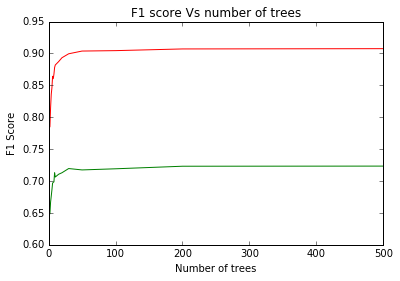

In [48]:
fig = plt.figure()
ax=fig.add_subplot(111)
plt.plot(tree_size, train_score, 'r', label = 'train score')
plt.plot(tree_size, valid_score, 'g', label = 'validation score')
ax.set_xlabel('Number of trees')
ax.set_ylabel('F1 Score')
plt.title('F1 score Vs number of trees')
plt.savefig("D:/Courses/DSGA1003/project/score_tree.png",dpi=1000)

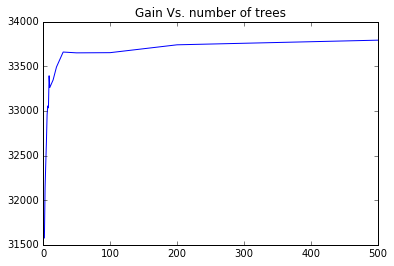

In [49]:
plt.plot(tree_size, valid_gain, 'b',label = 'validation gain')
ax.set_xlabel('Number of trees')
ax.set_ylabel('Gain of prediction')
plt.title('Gain Vs. number of trees')
plt.savefig("D:/Courses/DSGA1003/project/gain_tree.png",dpi=1000)

In [39]:
tree_depth = [2,3,4,5,6,7,8,9,10,15,20,30,50,100,200,500]
train_score = []
valid_score = []
valid_gain = []
for t in tree_depth:
    clf = DecisionTreeClassifier(class_weight={0:0.24, 1:1.23, 2:1.53}, criterion='gini', max_depth = t,
                            max_features=None, max_leaf_nodes=None, min_samples_leaf=20,
                            min_samples_split=20, presort=False, random_state=None, splitter='best')
    clf.fit(x_train, y_train)
    tr_score = f1_score(y_train, clf.predict(x_train), average='macro')
    val_score = f1_score(y_valid, clf.predict(x_valid), average='macro')
    tr_gain = get_gain(eval_matrix,confusion_matrix(y_train, clf.predict(x_train)))
    val_gain = get_gain(eval_matrix,confusion_matrix(y_valid, clf.predict(x_valid)))
    train_score.append(tr_score)
    valid_score.append(val_score)
    valid_gain.append(val_gain)

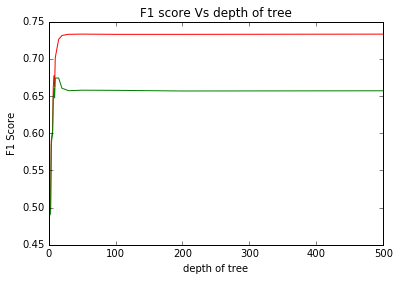

In [45]:
fig = plt.figure()
ax=fig.add_subplot(111)
plt.plot(tree_depth, train_score, 'r', label = 'train score')
plt.plot(tree_depth, valid_score, 'g', label = 'validation score')
ax.set_xlabel('depth of tree')
ax.set_ylabel('F1 Score')
plt.title('F1 score Vs depth of tree')
plt.savefig("D:/Courses/DSGA1003/project/score_dt.png",dpi=1000)

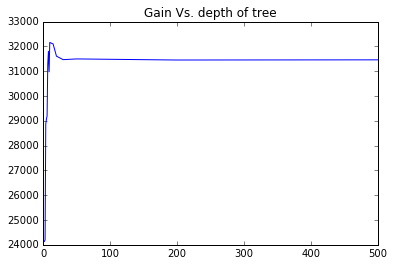

In [46]:
plt.plot(tree_depth, valid_gain, 'b',label = 'validation gain')
ax.set_xlabel('Depth of tree')
ax.set_ylabel('Gain of prediction')
plt.title('Gain Vs. depth of tree')
plt.savefig("D:/Courses/DSGA1003/project/gain_dt.png",dpi=1000)

## ROC

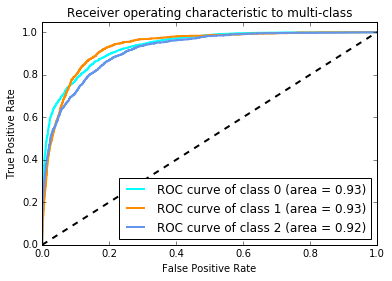

In [365]:
from sklearn.metrics import roc_curve
from itertools import cycle
predict = rf1.predict_proba(x_valid)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_valid == i, predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Precision Recall Curve

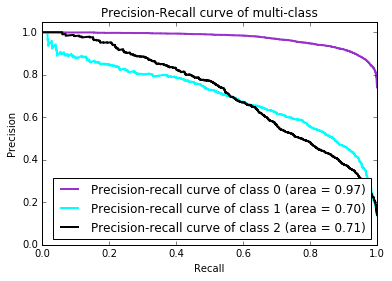

In [366]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle
predict = rf1.predict_proba(x_valid)
precision = dict()
recall = dict()
average_precision = dict()
lw = 2

colors = cycle(['darkorchid', 'aqua', 'black'])
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_valid == i, predict[:, i])
    average_precision[i] = average_precision_score(y_valid == i, predict[:, i])

for i, color in zip(range(3), colors):
    plt.plot(recall[i], precision[i], color=color, lw=lw,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve of multi-class')
plt.legend(loc="lower right")
plt.savefig("D:/Courses/DSGA1003/project/precision_recall_curve.png",dpi=1000)
plt.show()

## Feature Importance

In [367]:
importances = rf1.feature_importances_

In [368]:
std = np.std([tree.feature_importances_ for tree in rf1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [369]:
x_valid.columns[0]

'word_count'

In [370]:
for f in range(20):
    print("%d. feature %s (%f)" % (f + 1, x_valid.columns[indices[f]], importances[indices[f]]))

1. feature word_count (0.164212)
2. feature section_name_Opinion (0.114306)
3. feature auth_c (0.069941)
4. feature count_neg_word (0.054181)
5. feature ave_pos_polarity (0.049213)
6. feature abstract_word_cnt (0.041122)
7. feature max_pos_polarity (0.036939)
8. feature count_pos_word (0.035649)
9. feature section_name_Magazine (0.033752)
10. feature min_pos_polarity (0.031581)
11. feature abstract_unique_nonstopword_cnt (0.026253)
12. feature section_name_Food (0.025981)
13. feature abstract_nonstopword_cnt (0.022054)
14. feature section_name_U.S. (0.021322)
15. feature headline_word_cnt (0.020878)
16. feature abstract_subjectivity (0.018308)
17. feature section_name_The Upshot (0.016393)
18. feature section_name_false (0.016156)
19. feature snippet_subjectivity (0.015821)
20. feature snippet_word_cnt (0.015514)


In [371]:
imp = []
feat = []
for i in range(20):
    imp_i = importances[indices[i]]
    feat_i = x_valid.columns[indices[i]]
    imp.append(imp_i)
    feat.append(feat_i)

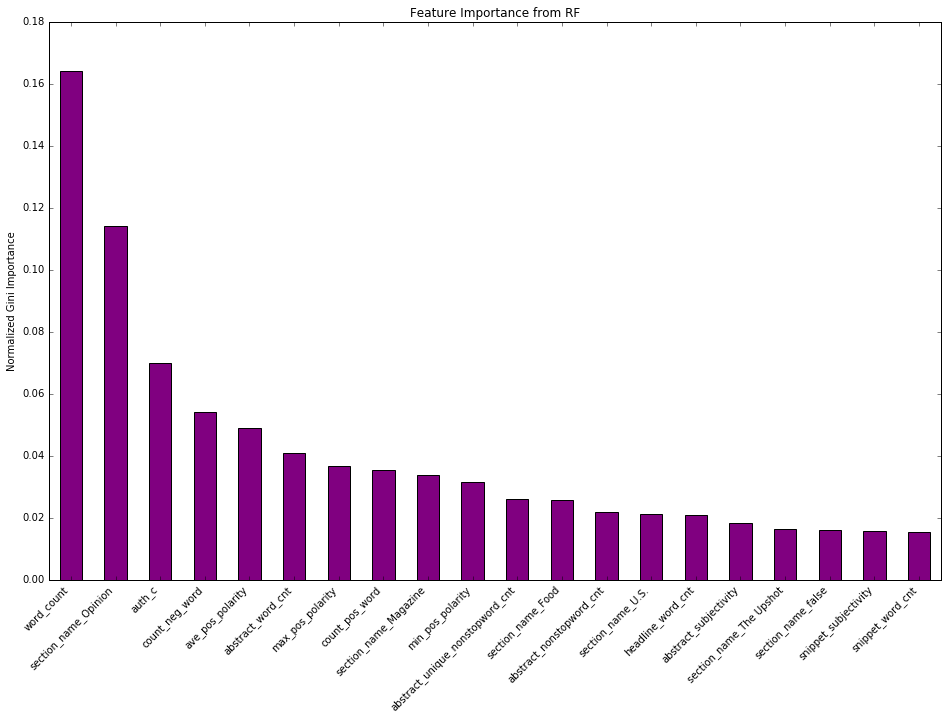

In [374]:
fig, ax = plt.subplots()
width=0.5
fig.set_size_inches(16, 10, forward=True)
ax.bar(np.arange(len(imp))+0.25, imp, width, color='purple')
ax.set_xticks(np.arange(len(imp))+0.5)
ax.set_xticklabels(feat,rotation=45,ha='right')
#ax.set_xticklabels(feat, rotation=45,ha='right', minor=False)

plt.title('Feature Importance from RF')
ax.set_ylabel('Normalized Gini Importance')
plt.savefig("D:/Courses/DSGA1003/project/top20_feats.png",dpi=1000)

## Ignore evrything below......................................

In [87]:
'''
Weighted tree and weighted F1 score
'''

print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
param_grid = {"criterion": ["gini"],
              "n_estimators":[50,100],
              "max_features":["auto","log2"],
              "max_depth": [None,10],
              "min_samples_split": [2,20],
              "max_leaf_nodes": [None],
              "min_samples_leaf": [10,100]
              }
#grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(2, 20), "n_estimators": range(10, 100, 10)}
rf = RandomForestClassifier(n_jobs = 2,class_weight={0:0.1, 1:0.3, 2:0.6})
ts_gs = run_gridsearch(x_train, y_train, rf, param_grid,'f1_macro', cv=10)

-- Grid Parameter Search via 10-fold CV

GridSearchCV took 206.30 seconds for 32 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.711 (std: 0.010)
Parameters: {'criterion': 'gini', 'n_estimators': 100, 'max_features': 'auto', 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_depth': None, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.711 (std: 0.011)
Parameters: {'criterion': 'gini', 'n_estimators': 100, 'max_features': 'auto', 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_depth': None, 'min_samples_split': 20}

Model with rank: 3
Mean validation score: 0.709 (std: 0.009)
Parameters: {'criterion': 'gini', 'n_estimators': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_depth': None, 'min_samples_split': 20}



In [152]:
from sklearn.metrics import f1_score
print('F1 scores:')
predict = rf1.predict(x_valid)
print('Weighted:', f1_score(y_valid, predict, average='macro'))
print('Class 0:',f1_score(y_valid == 0, predict == 0))
print('Class 1:',f1_score(y_valid == 1, predict == 1))
print('Class 2:',f1_score(y_valid == 2, predict == 2))

F1 scores:
Weighted: 0.721480776448
Class 0: 0.898386708404
Class 1: 0.637853949329
Class 2: 0.62820167161


In [205]:
pred_matrix = confusion_matrix(y_valid, rf1.predict(x_valid))
pred_matrix

array([[7462,  495,  583],
       [ 267, 1070,  292],
       [ 343,  161, 1165]])

In [195]:
pred_matrix[2,2]

1165

In [196]:
gain_matrix = np.array([[pred_matrix[0,0]*eval_matrix[0,0],pred_matrix[0,1]*eval_matrix[0,1],pred_matrix[0,2]*eval_matrix[0,2]],
                       [pred_matrix[1,0]*eval_matrix[1,0],pred_matrix[1,1]*eval_matrix[1,1],pred_matrix[1,2]*eval_matrix[1,2]],
                       [pred_matrix[2,0]*eval_matrix[2,0],pred_matrix[2,1]*eval_matrix[2,1],pred_matrix[2,2]*eval_matrix[2,2]]])

In [197]:
gain_matrix

array([[22386,   990,     0],
       [  534,  4280,   584],
       [    0,   322,  5825]])

In [198]:
np.sum(gain_matrix)

34921

## ROC

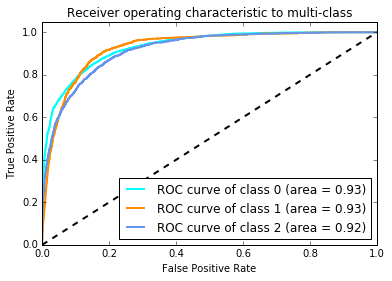

In [208]:
from sklearn.metrics import roc_curve
from itertools import cycle
predict = rf1.predict_proba(x_valid)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_valid == i, predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Precision_Recall_Curve

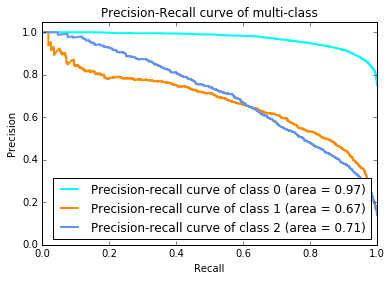

In [214]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle
predict = rf1.predict_proba(x_valid)
precision = dict()
recall = dict()
average_precision = dict()
lw = 2

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_valid == i, predict[:, i])
    average_precision[i] = average_precision_score(y_valid == i, predict[:, i])

for i, color in zip(range(3), colors):
    plt.plot(recall[i], precision[i], color=color, lw=lw,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve of multi-class')
plt.legend(loc="lower right")
plt.savefig("D:/Courses/DSGA1003/project/precision_recall_curve.png",dpi=1000)
plt.show()

In [30]:
'''
Weighted tree and weighted F1 score
'''

print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
param_grid = {"criterion": ["gini"],
              "n_estimators":[50,100],
              "max_features":["auto","log2",None],
              "max_depth": [None,10],
              "min_samples_split": [2,100],
              "max_leaf_nodes": [None,50],
              "min_samples_leaf": [10,100]
              }
#grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(2, 20), "n_estimators": range(10, 100, 10)}
rf = RandomForestClassifier(n_jobs = 2,class_weight={0:0.1, 1:0.3, 2:0.6})
ts_gs = run_gridsearch(x_train, y_train, rf, param_grid,'f1_weighted', cv=10)

-- Grid Parameter Search via 10-fold CV

GridSearchCV took 2174.60 seconds for 96 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.832 (std: 0.006)
Parameters: {'n_estimators': 100, 'max_depth': None, 'max_features': None, 'criterion': 'gini', 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.832 (std: 0.006)
Parameters: {'criterion': 'gini', 'n_estimators': 50, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': None, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.813 (std: 0.007)
Parameters: {'n_estimators': 100, 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'max_features': 'auto', 'criterion': 'gini', 'min_samples_split': 2}



In [36]:
rf1 = RandomForestClassifier(n_jobs = 2,class_weight={0:0.1, 1:0.3, 2:0.6},n_estimators = 100, max_depth = None, 
                             max_features = None, max_leaf_nodes = None, min_samples_leaf = 10, min_samples_split = 2)
rf1.fit(x_valid, y_valid)
f1_score(y_valid, rf1.predict(x_valid), average='weighted')

0.88517268117100245

In [40]:
rf1.score(x_valid, y_valid)

0.88131441121811116

In [75]:
confusion_matrix(y_valid, rf1.predict(x_valid))

array([[7663,  442,  435],
       [ 182, 1226,  221],
       [  63,   62, 1544]])

In [53]:
'''
2nd grid search for Weighted tree and weighted F1 score
'''

print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
param_grid = {"criterion": ["gini"],
              "n_estimators":[500],
              "max_features":["auto","log2",None],
              "max_depth": [None],
              "min_samples_split": [2,10],
              "max_leaf_nodes": [None],
              "min_samples_leaf": [2,5,10]
              }
#grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(2, 20), "n_estimators": range(10, 100, 10)}
rf = RandomForestClassifier(n_jobs = 2,class_weight={0:0.1, 1:0.3, 2:0.6})
ts_gs = run_gridsearch(x_train, y_train, rf, param_grid,'f1_micro', cv=10)

-- Grid Parameter Search via 10-fold CV

GridSearchCV took 3166.60 seconds for 18 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.849 (std: 0.004)
Parameters: {'criterion': 'gini', 'n_estimators': 500, 'max_features': None, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_depth': None, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.847 (std: 0.005)
Parameters: {'n_estimators': 500, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'max_depth': None, 'max_features': None, 'criterion': 'gini', 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.843 (std: 0.004)
Parameters: {'criterion': 'gini', 'n_estimators': 500, 'max_features': None, 'min_samples_leaf': 5, 'max_leaf_nodes': None, 'max_depth': None, 'min_samples_split': 2}



In [58]:
rf2 = RandomForestClassifier(n_jobs = 2,class_weight={0:0.1, 1:0.3, 2:0.6},n_estimators = 500, max_depth = None, 
                             max_features = None, max_leaf_nodes = None, min_samples_leaf = 2, min_samples_split = 2)
rf2.fit(x_train, y_train)
f1_score(y_valid, rf2.predict(x_valid), average='micro')

0.84347018077377933

In [60]:
rf2 = RandomForestClassifier(n_jobs = 2,class_weight={0:0.1, 1:0.3, 2:0.6},n_estimators = 500, max_depth = None, 
                             max_features = None, max_leaf_nodes = None, min_samples_leaf = 2, min_samples_split = 2)
rf2.fit(x_train, y_train)
f1_score(y_valid, rf2.predict(x_valid), average='weighted')

0.83901101097280839

In [61]:
confusion_matrix(y_valid, rf2.predict(x_valid))

array([[8026,  349,  165],
       [ 395, 1030,  204],
       [ 546,  186,  937]])

In [62]:
rf2 = RandomForestClassifier(n_jobs = 2,class_weight={0:0.1, 1:0.3, 2:0.6},n_estimators = 500, max_depth = None, 
                             max_features = None, max_leaf_nodes = None, min_samples_leaf = 2, min_samples_split = 10)
rf2.fit(x_train, y_train)
f1_score(y_valid, rf2.predict(x_valid), average='weighted')

0.83895592778242534

In [63]:
confusion_matrix(y_valid, rf2.predict(x_valid))

array([[7877,  414,  249],
       [ 336, 1065,  228],
       [ 483,  175, 1011]])

In [64]:
rf2 = RandomForestClassifier(n_jobs = 2,n_estimators = 500, max_depth = None, 
                             max_features = None, max_leaf_nodes = None, min_samples_leaf = 2, min_samples_split = 10)
rf2.fit(x_train, y_train)
f1_score(y_valid, rf2.predict(x_valid), average='weighted')

0.83987220584774824

In [65]:
rf2 = RandomForestClassifier(n_jobs = 2,n_estimators = 500, max_depth = None, 
                             max_features = None, max_leaf_nodes = None, min_samples_leaf = 2, min_samples_split = 10)
rf2.fit(x_train, y_train)
f1_score(y_valid, rf2.predict(x_valid), average='micro')

0.84701807737793544

In [66]:
rf2 = RandomForestClassifier(n_jobs = 2,n_estimators = 500, max_depth = None, 
                             max_features = None, max_leaf_nodes = None, min_samples_leaf = 2, min_samples_split = 10)
rf2.fit(x_train, y_train)
f1_score(y_valid, rf2.predict(x_valid), average=None)

array([ 0.91869228,  0.64614408,  0.62100139])

In [67]:
rf2 = RandomForestClassifier(n_jobs = 2,class_weight={0:0.1, 1:0.3, 2:0.6},n_estimators = 500, max_depth = None, 
                             max_features = None, max_leaf_nodes = None, min_samples_leaf = 2, min_samples_split = 10)
rf2.fit(x_train, y_train)
f1_score(y_valid, rf2.predict(x_valid), average='micro')

0.84017570535563435

In [68]:
rf2 = RandomForestClassifier(n_jobs = 2,class_weight={0:0.1, 1:0.3, 2:0.6},n_estimators = 500, max_depth = None, 
                             max_features = None, max_leaf_nodes = None, min_samples_leaf = 2, min_samples_split = 10)
rf2.fit(x_train, y_train)
f1_score(y_valid, rf2.predict(x_valid), average='macro')

0.73313979153369535

In [69]:
rf2.fit(x_train, y_train)
f1_score(y_test, rf2.predict(x_test), average='weighted')

0.84535218468587447

In [72]:
'''
3rd grid search for Weighted tree and weighted F1 score
'''

print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
param_grid = {"criterion": ["gini"],
              "n_estimators":[200],
              "max_features":["auto","log2",10],
              "max_depth": [None],
              "min_samples_split": [2,10],
              "max_leaf_nodes": [None],
              "min_samples_leaf": [2,10]
              }
#grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(2, 20), "n_estimators": range(10, 100, 10)}
rf = RandomForestClassifier(n_jobs = 2,class_weight={0:0.1, 1:0.3, 2:0.6})
ts_gs = run_gridsearch(x_train, y_train, rf, param_grid,'f1_micro', cv=10)

-- Grid Parameter Search via 10-fold CV

GridSearchCV took 316.94 seconds for 12 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.845 (std: 0.005)
Parameters: {'n_estimators': 200, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'criterion': 'gini', 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.842 (std: 0.006)
Parameters: {'n_estimators': 200, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'criterion': 'gini', 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.839 (std: 0.006)
Parameters: {'n_estimators': 200, 'max_features': 10, 'min_samples_leaf': 2, 'criterion': 'gini', 'max_leaf_nodes': None, 'max_depth': None, 'min_samples_split': 10}



In [31]:
'''
Weighted tree and accuracy
'''

print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
param_grid = {"criterion": ["gini"],
              "n_estimators":[50,100],
              "max_features":["auto","log2",None],
              "max_depth": [None,10],
              "min_samples_split": [2,100],
              "max_leaf_nodes": [None,50],
              "min_samples_leaf": [10,100]
              }
#grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(2, 20), "n_estimators": range(10, 100, 10)}
rf = RandomForestClassifier(n_jobs = 2,class_weight={0:0.1, 1:0.3, 2:0.6})
ts_gs = run_gridsearch(x_train, y_train, rf, param_grid, None, cv=10)

-- Grid Parameter Search via 10-fold CV

GridSearchCV took 2180.46 seconds for 96 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.827 (std: 0.005)
Parameters: {'n_estimators': 100, 'max_depth': None, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.825 (std: 0.004)
Parameters: {'n_estimators': 50, 'max_features': None, 'min_samples_leaf': 10, 'max_depth': None, 'max_leaf_nodes': None, 'criterion': 'gini', 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.805 (std: 0.009)
Parameters: {'n_estimators': 100, 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'max_features': 'auto', 'criterion': 'gini', 'min_samples_split': 2}



In [32]:
'''
accuracy
'''

print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
param_grid = {"criterion": ["gini"],
              "n_estimators":[50,100],
              "max_features":["auto","log2",None],
              "max_depth": [None,10],
              "min_samples_split": [2,100],
              "max_leaf_nodes": [None,50],
              "min_samples_leaf": [10,100]
              }
#grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(2, 20), "n_estimators": range(10, 100, 10)}
rf = RandomForestClassifier(n_jobs = 2)
ts_gs = run_gridsearch(x_train, y_train, rf, param_grid, None, cv=10)

-- Grid Parameter Search via 10-fold CV

GridSearchCV took 1780.27 seconds for 96 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.851 (std: 0.005)
Parameters: {'n_estimators': 100, 'max_depth': None, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.849 (std: 0.005)
Parameters: {'n_estimators': 50, 'max_depth': None, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.845 (std: 0.004)
Parameters: {'n_estimators': 50, 'max_depth': 10, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}



## Decision Tree


# weighted trees

In [15]:
clf = DecisionTreeClassifier(class_weight={0:0.11, 1:0.3, 2:0.6}, criterion='gini', max_depth=10,
                            max_features=None, max_leaf_nodes=None, min_samples_leaf=10,
                            min_samples_split=20, min_weight_fraction_leaf=0.0,
                            presort=False, random_state=None, splitter='best')
clf.fit(x_train.drop(['word_count'],1), y_train)

DecisionTreeClassifier(class_weight={0: 0.11, 1: 0.3, 2: 0.6},
            criterion='gini', max_depth=10, max_features=None,
            max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
clf.score(x_valid.drop(['word_count'],1), y_valid)

0.76085487413414432

In [17]:
f1_score(y_valid, clf.predict(x_valid.drop(['word_count'],1)), average='weighted')

0.77572321975822178

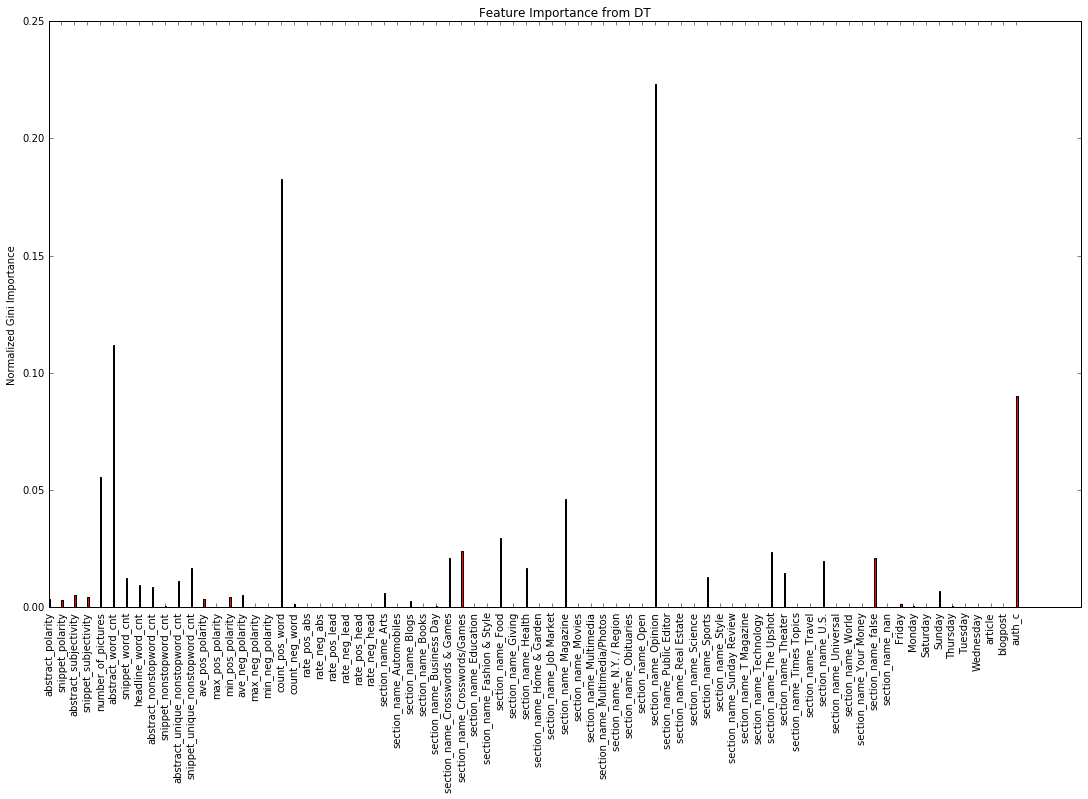

In [18]:
fig, ax = plt.subplots()
width=0.1
fig.set_size_inches(18.5, 10.5, forward=True)
ax.bar(np.arange(len(clf.feature_importances_)), clf.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(x_valid.drop(['word_count'],1).columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

In [19]:
clf = DecisionTreeClassifier(class_weight={0:0.1, 1:0.3, 2:0.6}, criterion='gini', max_depth=10,
                            max_features=None, max_leaf_nodes=None, min_samples_leaf=10,
                            min_samples_split=20, min_weight_fraction_leaf=0.0,
                            presort=False, random_state=None, splitter='best')
clf.fit(x_train.drop(['auth_c'],1), y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.3, 2: 0.6},
            criterion='gini', max_depth=10, max_features=None,
            max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
clf.score(x_valid.drop(['auth_c'],1), y_valid)

0.74683223517486064

In [21]:
f1_score(y_valid, clf.predict(x_valid.drop(['auth_c'],1)), average='weighted')

0.76413794516011402

In [22]:
clf = DecisionTreeClassifier(class_weight={0:0.1, 1:0.3, 2:0.6}, criterion='gini', max_depth=10,
                            max_features=None, max_leaf_nodes=None, min_samples_leaf=10,
                            min_samples_split=20, min_weight_fraction_leaf=0.0,
                            presort=False, random_state=None, splitter='best')
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.3, 2: 0.6},
            criterion='gini', max_depth=10, max_features=None,
            max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
clf.score(x_valid, y_valid)

0.75291434363912824

In [24]:
f1_score(y_valid, clf.predict(x_valid), average='weighted')

0.77129867630226545

In [37]:
clf.predict_proba(x_valid).shape

(11838, 3)

In [26]:
clf.predict_proba(x_valid)[1,:]

array([ 0.54801921,  0.12064826,  0.33133253])

In [74]:
clf.predict_proba(x_valid)[:,0]

array([ 1.        ,  0.54801921,  0.82579609, ...,  0.82579609,
        1.        ,  0.4375    ])